In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def countWeight(pauli_string):
    """
    Counts the number of non-identity Paulis in a given string.
    """
    
    return sum(1 for p in pauli_string if p != 'I')

def generateSample(weight, length):
    """
    Generates a Pauli string of length `length` with a given weight `weight`.
    """
    
    # Initialize all identities
    pauli_string = ['I'] * length
    
    # Randomly choose k distinct positions
    positions = np.random.choice(length, size=weight, replace=False)
    
    # Assign random Paulis (X, Y, Z) to the chosen positions
    paulis = ['X', 'Y', 'Z']
    for pos in positions:
        pauli_string[pos] = np.random.choice(paulis)
    
    return ''.join(pauli_string)

def commutes(pauli1, pauli2):
    """
    Check if two Pauli strings commute.
    """
    anti_commute_count = 0
    for p1, p2 in zip(pauli1, pauli2):
        if p1 == 'I' or p2 == 'I':
            continue  
        if p1 != p2:
            anti_commute_count += 1
    
    # If the number of anti-commuting pairs is even, they commute.
    return anti_commute_count % 2 == 0

def pauliProduct(pauli1, pauli2):
    """
    Computes the product of two Pauli strings.
    """
    
    result = []
    for p1, p2 in zip(pauli1, pauli2):
        if p1 == 'I':
            result.append(p2)
        elif p2 == 'I':
            result.append(p1)
        elif p1 == p2:
            result.append('I')
        else:
            # X*Y = Z, Y*Z = X, Z*X = Y
            if (p1 == 'X' and p2 == 'Y') or (p1 == 'Y' and p2 == 'X'):
                result.append('Z')
            elif (p1 == 'Y' and p2 == 'Z') or (p1 == 'Z' and p2 == 'Y'):
                result.append('X')
            elif (p1 == 'Z' and p2 == 'X') or (p1 == 'X' and p2 == 'Z'):
                result.append('Y')
    
    return ''.join(result)

def newWeight(pauli1, pauli2):
    """
    Calculates new weight following the branching rule:"
    """
    if not commutes(pauli1, pauli2):
        return max(countWeight(pauli1), countWeight(pauli2))
    else:
        return countWeight(pauliProduct(pauli1, pauli2))


Text(0, 0.5, 'Probability of decreasing weight')

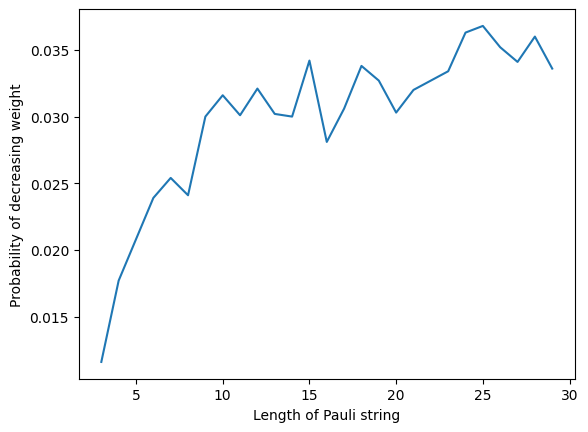

In [7]:
samples = 10000
length = np.arange(3, 30)
prob = np.zeros(len(length))
for j in range(len(length)):
    for i in range(samples):
        weight = np.random.choice(length[j], 1)[0] # Sample a random weight
        pauli1 = generateSample(weight, length[j])
        pauli2 = generateSample(2, length[j]) # We only consider two weighted Paulis
        nWeight = newWeight(pauli1, pauli2)
        if nWeight < weight:
            prob[j] += 1 

prob = prob / samples
plt.plot(length, prob)
plt.xlabel('Length of Pauli string')
plt.ylabel('Probability of decreasing weight')

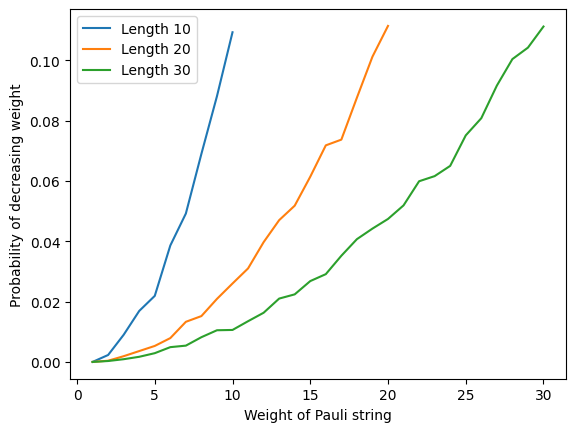

In [8]:
samples = 10000
length = [10, 20, 30]
plt.figure()
for k in range(len(length)):
    weight = np.arange(1, length[k]+1)
    prob = np.zeros(len(weight))
    for j in range(len(weight)):
        for i in range(samples):
            pauli1 = generateSample(weight[j],length[k])
            pauli2 = generateSample(2, length[k]) # We only consider two weighted Paulis
            nWeight = newWeight(pauli1, pauli2)
            if nWeight < weight[j]:
                prob[j] += 1 

    prob = prob / samples
    plt.plot(weight, prob, label=f'Length {length[k]}')
plt.xlabel('Weight of Pauli string')
plt.ylabel('Probability of decreasing weight')
plt.legend()

In [1]:
def analyticFormula(length, weight):
    """
    Analytic formula for the probability of decreasing weight.
    """
    
    return 1/9 * weight*(weight-1)/(length*(length-1))

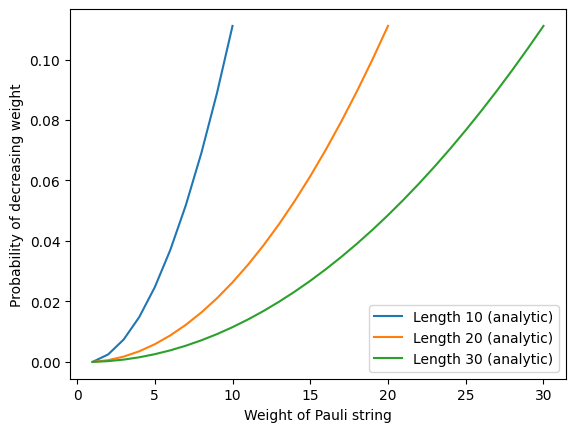

In [4]:
length  = [10, 20, 30]
plt.figure()
for i in range(len(length)):
    weight = np.arange(1, length[i]+1)
    prob = analyticFormula(length[i], weight)
    plt.plot(weight, prob, label=f'Length {length[i]} (analytic)')
plt.xlabel('Weight of Pauli string')
plt.ylabel('Probability of decreasing weight')
plt.legend()
plt.show()